# **Analyzing the features that impact on Developer Salaries Using Machine Learning - Project Data Science Blog**

The goal of this project is to analyze how different factors (education levels, country, work experience, platforms used and other) influence developer salaries and build a machine learning model to predict salaries based on education and other factors.

Author: Carolina Barros

### Table of Contents
1. [Introduction & Objective](#1-introduction--objective)
2. [Importing Libraries](#2-importing-libraries)
3. [Loading the Dataset](#3-loading-the-dataset)
4. [Data Cleaning & Preprocessing](#4-data-cleaning--preprocessing)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
6. [Feature Engineering](#6-feature-engineering-if-applicable)
7. [Splitting Data into Training & Testing Sets](#7-splitting-data-into-training--testing-sets)
8. [Model Training](#8-model-training)
9. [Model Performance Metrics](#9-model-performance-metrics)
10. [Conclusion & Future Work](#10-conclusion--future-work)


### 1. Introduction & Objective
This notebook analyzes the dataset and builds a predictive model.


### 2. Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### 3. Loading the Dataset

In [2]:
# Load dataset
df = pd.read_csv("../data/dataset.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Display first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,WorkExp,Industry,JobSat
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",3,1,Data scientist or machine learning specialist,100 to 499 employees,Pakistan,PKR\tPakistani rupee,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,3.0,Software Development,10.0
1,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,6,Data scientist or machine learning specialist,20 to 99 employees,Turkey,EUR European Euro,85000.0,JavaScript;Julia;Python;SQL;TypeScript,DuckDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Cloudflare;Digital O...,Next.js;React;Vue.js,7.0,Computer Systems Design and Services,10.0
2,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7,7,Student,10 to 19 employees,United States of America,USD\tUnited States dollar,110000.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,IBM DB2;MySQL;SQLite,Amazon Web Services (AWS),FastAPI;Flask;Node.js;Vue.js,8.0,"Transportation, or Supply Chain",10.0
3,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",32,18,Engineering manager,"1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,126420.0,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,BigQuery;Oracle;PostgreSQL,Amazon Web Services (AWS),React,18.0,Retail and Consumer Services,7.0
4,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Some college/university study without earning ...,38,30,"Developer, full-stack","1,000 to 4,999 employees",United States of America,USD\tUnited States dollar,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,Microsoft Azure,Angular;ASP.NET CORE;React,30.0,Healthcare,5.0


In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'WorkExp', 'Industry', 'JobSat'],
      dtype='object')

### 4. Data Cleaning & Preprocessing

In [4]:
# Check unique values of Employement column
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, part-time;Employed, part-time',
       'Employed, full-time;Not employed, but looking for work',
       'Employed, full-time;Employed, part-time'

In [5]:
# Filter rows where 'employment_status' contains 'Employed, full-time', For analysing salaries it would be better to analyze anoly full-time status. 
df = df[df['Employment'].str.contains('Employed, full-time', na=False)]
df.shape

(12609, 20)

In [6]:
df['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies'],
      dtype=object)

In [7]:
df['Age'].unique()

array(['18-24 years old', '35-44 years old', '25-34 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [8]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            5613
Developer, back-end                              2897
Developer, front-end                              612
Engineering manager                               412
Developer, desktop or enterprise applications     342
Other (please specify):                           315
DevOps specialist                                 261
Data engineer                                     240
Developer, mobile                                 236
Senior Executive (C-Suite, VP, etc.)              219
Data scientist or machine learning specialist     182
Cloud infrastructure engineer                     168
Research & Development role                       142
Developer, embedded applications or devices       114
Developer, AI                                     100
Developer, QA or test                              90
Engineer, site reliability                         87
Academic researcher                                67
Project manager     

There is a lot of categories in dev type variable so I think I am going to reduce it for make it simpler.
Proposed Grouping:
- Software Developer: Developer (full-stack, back-end, front-end, mobile, desktop/enterprise applications, embedded applications, game/graphics, AI, QA/test)
- Data & AI: Data Scientist or Machine Learning Specialist, Data Engineer, Data or Business Analyst, Developer, AI, Infrastructure & DevOps
- DevOps Specialist: Cloud Infrastructure Engineer, Site Reliability Engineer, System Administrator, Management & Leadership
- Engineering Manager: Project Manager, Product Manager, Senior Executive (C-Suite, VP, etc.)
- Academic & Research: Academic Researcher, Research & Development Role, Scientist,Educator, Student
- Security & Database: Security Professional, Database Administrator, 
- Other Technical Roles: Blockchain, Developer Advocate, Developer Experience, Hardware Engineer, 
- Non-Technical Roles: Designer, Marketing or Sales Professional, Other

In [9]:

# Mapping dictionary
category_map = {
    'Developer, full-stack': 'Software Developer',
    'Developer, back-end': 'Software Developer',
    'Developer, front-end': 'Software Developer',
    'Developer, mobile': 'Software Developer',
    'Developer, desktop or enterprise applications': 'Software Developer',
    'Developer, embedded applications or devices': 'Software Developer',
    'Developer, game or graphics': 'Software Developer',
    'Developer, AI': 'Data & AI',
    'Developer, QA or test': 'Software Developer',
    'Data scientist or machine learning specialist': 'Data & AI',
    'Data engineer': 'Data & AI',
    'Data or business analyst': 'Data & AI',
    'Cloud infrastructure engineer': 'Infrastructure & DevOps',
    'Engineer, site reliability': 'Infrastructure & DevOps',
    'DevOps specialist': 'Infrastructure & DevOps',
    'System administrator': 'Infrastructure & DevOps',
    'Engineering manager': 'Management & Leadership',
    'Project manager': 'Management & Leadership',
    'Product manager': 'Management & Leadership',
    'Senior Executive (C-Suite, VP, etc.)': 'Management & Leadership',
    'Academic researcher': 'Academic & Research',
    'Research & Development role': 'Academic & Research',
    'Scientist': 'Academic & Research',
    'Security professional': 'Security & Database',
    'Database administrator': 'Security & Database',
    'Blockchain': 'Other Technical Roles',
    'Developer Advocate': 'Other Technical Roles',
    'Developer Experience': 'Other Technical Roles',
    'Hardware Engineer': 'Other Technical Roles',
    'Designer': 'Non-Technical Roles',
    'Marketing or sales professional': 'Non-Technical Roles',
    'Educator': 'Academic & Research',
    'Student': 'Academic & Research',
    'Other (please specify):': 'Non-Technical Roles'
}

# Apply mapping
df['role_category'] = df['DevType'].map(category_map)


In [10]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          6107
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       3344
Some college/university study without earning a degree                                1563
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     559
Associate degree (A.A., A.S., etc.)                                                    461
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         408
Something else                                                                         109
Primary/elementary school                                                               58
Name: count, dtype: int64

In [11]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                            187
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                     162
C#;HTML/CSS;JavaScript;SQL                                                                                100
HTML/CSS;JavaScript;PHP;SQL                                                                                98
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                                                           89
                                                                                                         ... 
Bash/Shell (all shells);C;C++;Elixir;Erlang;Go;JavaScript;Kotlin;Lua;MicroPython;Python;SQL;TypeScript      1
Groovy;HTML/CSS;Java;JavaScript                                                                             1
Bash/Shell (all shells);C;Dart;Go;HTML/CSS;JavaScript;Python;TypeScript                          

In [12]:
# Create the new column with the number of languages
df['num_languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(';')))

In [13]:
# Create the new column with the main (first) language
df['main_language'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';')[0])

Index['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'WorkExp', 'Industry', 'JobSat'],
      dtype='object

In [14]:
# Create the new column with the number of databases have worked with
df['num_databases'] = df['DatabaseHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) database have worke with
df['main_database'] = df['DatabaseHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [15]:
# Create the new column with the number of platforms have worked with
df['num_platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) platform have worke with
df['main_platform'] = df['PlatformHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [16]:
# Create the new column with the number of webframes have worked with
df['num_webframes'] = df['WebframeHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) webframe have worke with
df['main_webframe'] = df['WebframeHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [17]:
df['Industry'].value_counts()

Industry
Software Development                          5195
Other:                                        1303
Fintech                                        832
Internet, Telecomm or Information Services     667
Retail and Consumer Services                   636
Healthcare                                     626
Banking/Financial Services                     624
Media & Advertising Services                   460
Manufacturing                                  435
Transportation, or Supply Chain                398
Government                                     389
Higher Education                               305
Computer Systems Design and Services           291
Energy                                         247
Insurance                                      201
Name: count, dtype: int64

In [18]:
# Drop columns LanguageHaveWorkedWith,DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith.
df = df.drop(['MainBranch','DevType','LanguageHaveWorkedWith','DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith','WebframeHaveWorkedWith'], axis=1)

In [19]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSat,num_languages,num_databases,num_platforms,num_webframes
count,12609.000000,1.260900e+04,12609.000000,12609.000000,12609.000000,12609.000000,12609.000000,12609.000000
mean,28440.231739,7.930843e+60,11.437545,7.009041,5.971687,3.502022,2.440955,3.807281
std,17099.435405,8.905528e+62,8.583621,2.060725,3.100179,2.327456,1.799523,2.656487
min,73.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,13659.000000,6.500000e+04,5.000000,6.000000,4.000000,2.000000,1.000000,2.000000
50%,27302.000000,1.200000e+05,9.000000,7.000000,5.000000,3.000000,2.000000,3.000000
75%,42474.000000,2.900000e+05,16.000000,8.000000,7.000000,5.000000,3.000000,5.000000
max,65242.000000,1.000000e+65,50.000000,10.000000,49.000000,35.000000,27.000000,36.000000


In [20]:
# Detect outliers

# Function to get the number of outliers using IQR (Interquantile Range) method:

def outliers_iqr(df, columns, iqr_multiplier = 1.5):
    
    """Detect outliers in columns in a dataframe using the IQR method and returns a dataframe with # outliers, 
    IQR value, and upper and lower limits.
    Parameters:
    df: dataframe
    columns: list of columns names to detect outliers 
    iqr_multiplier: default value 1.5 (the closest to what Gaussian Distribution considers for outlier detection)
    
    Returns:
    results_df: dataframe with the results of the oultier detection"""
    
    results = []
    for column in columns:
        # Calculate quartiles and IQR
        q1, q3 = np.quantile(df[column], [0.25,0.75])
        iqr = q3 - q1
        
        # Calculate lower and upper limits
        lower_limit = q1 - iqr_multiplier * iqr
        upper_limit = q3 + iqr_multiplier * iqr
        
        # Count the number of outilers
        num_outliers = ((df[column] < lower_limit) | (df[column] > upper_limit)).sum()

         # Calculate the percentage of outliers
        total_values = len(df[column])
        outlier_percentage = (num_outliers / total_values) * 100
        
        # Store results in a dictionary
        result = {
            'Column' : column,
            'IQR': iqr,
            'Lower limit': lower_limit,
            'Upper limit': upper_limit,
            'Num Outliers': num_outliers,
            'Outlier Percentage': round(outlier_percentage, 2)  # Rounded to 2 decimal places
        }
        
        results.append(result)
    
    # Convert results to a dataframe and return it
    results_df = pd.DataFrame(results)
    results_df = results_df[['Column','IQR','Lower limit','Upper limit','Num Outliers','Outlier Percentage']]
    
    return results_df

In [21]:
columns_num = ['CompTotal' ,'WorkExp',	'JobSat', 'num_languages', 'num_databases' ,'num_platforms', 'num_webframes']
outliers_df = outliers_iqr(df, columns_num)
outliers_df

,Column,IQR,Lower limit,Upper limit,Num Outliers,Outlier Percentage
0,CompTotal,225000.0,-272500.0,627500.0,2194,17.40
1,WorkExp,11.0,-11.5,32.5,347,2.75
2,JobSat,2.0,3.0,11.0,553,4.39
3,num_languages,3.0,-0.5,11.5,643,5.10
4,num_databases,3.0,-2.5,9.5,272,2.16
5,num_platforms,2.0,-2.0,6.0,439,3.48
6,num_webframes,3.0,-2.5,9.5,453,3.59


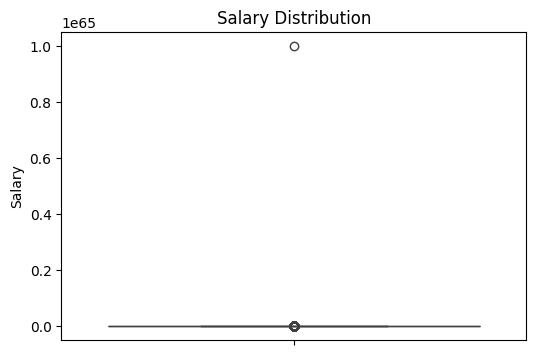

In [22]:
# Creating a Boxplot of compensation variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df['CompTotal'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

A lot of compensation toal values Are Likely Noise (Errors) AFTER CHECKING THE BOX PLOT AND DESCRIPTIVE STATISTICS, we can see they might be noise. So my strategy to deal with them is to impute them, replacing the outliers with the median salary. 

In [23]:

def impute_outliers_with_median(df, column):
    new_df = df.copy()
    
    """This function replaces all outliers in a single column using the IQR method with the column's median.
    
    Parameters:
    df: DataFrame containing the values to analyze for outlier detection.
    column: Name of the column to process.

    Returns:
    new_df: DataFrame with outliers replaced by the column median.
    """

    # Calculate quartiles and IQR
    q1, q3 = np.quantile(df[column], [0.25, 0.75])
    iqr = q3 - q1

    # Calculate lower and upper limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (df[column] < lower_limit) | (df[column] > upper_limit)

    # Replace outliers with the median value of the column
    median_value = df[column].median()
    new_df.loc[outliers, column] = median_value
            
    return new_df


In [24]:
df_cleaned = impute_outliers_with_median(df, 'CompTotal')

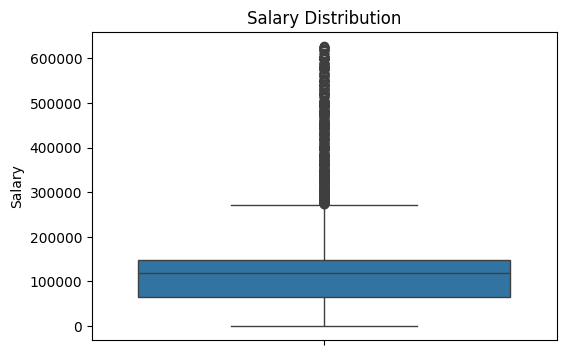

In [25]:
# Creating a Boxplot of compensation variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cleaned['CompTotal'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

In [26]:
df_cleaned['Country'].value_counts()

Country
United States of America                                2779
Germany                                                  862
United Kingdom of Great Britain and Northern Ireland     810
India                                                    731
Ukraine                                                  536
                                                        ... 
Cameroon                                                   1
Barbados                                                   1
Suriname                                                   1
Cape Verde                                                 1
Trinidad and Tobago                                        1
Name: count, Length: 147, dtype: int64

In [27]:
# Country to continent mapping
country_to_continent = {
    'Pakistan': 'Asia', 'Turkey': 'Asia', 'United States of America': 'North America', 
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Brazil': 'South America', 
    'South Africa': 'Africa', 'France': 'Europe', 'Canada': 'North America', 'Ukraine': 'Europe', 
    'Germany': 'Europe', 'Bolivia': 'South America', 'Morocco': 'Africa', 'India': 'Asia', 
    'Georgia': 'Asia', 'Ireland': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Switzerland': 'Europe', 'Lithuania': 'Europe', 'Netherlands': 'Europe', 'Romania': 'Europe', 
    'Latvia': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe', 'Portugal': 'Europe', 
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Israel': 'Asia', 'Serbia': 'Europe', 
    'Russian Federation': 'Asia', 'Bangladesh': 'Asia', 'Denmark': 'Europe', 'Poland': 'Europe', 
    'Saudi Arabia': 'Asia', 'Mexico': 'North America', 'Bulgaria': 'Europe', 'Slovakia': 'Europe', 
    'Algeria': 'Africa', 'Venezuela, Bolivarian Republic of...': 'South America', 'Malaysia': 'Asia', 
    'Finland': 'Europe', 'Malta': 'Europe', 'Belgium': 'Europe', 'Croatia': 'Europe', 
    'Argentina': 'South America', 'Slovenia': 'Europe', 'Isle of Man': 'Europe', 'Palestine': 'Asia', 
    'Ecuador': 'South America', 'Greece': 'Europe', 'Paraguay': 'South America', 'Guatemala': 'North America', 
    'New Zealand': 'Oceania', 'Egypt': 'Africa', 'Nigeria': 'Africa', 'South Korea': 'Asia', 
    'Hungary': 'Europe', 'Peru': 'South America', 'Australia': 'Oceania', 'Philippines': 'Asia', 
    'Japan': 'Asia', 'United Arab Emirates': 'Asia', 'Thailand': 'Asia', 'Uruguay': 'South America', 
    'Hong Kong (S.A.R.)': 'Asia', 'China': 'Asia', 'Sri Lanka': 'Asia', 'Singapore': 'Asia', 
    'Armenia': 'Asia', 'Nepal': 'Asia', 'Norway': 'Europe', 'Taiwan': 'Asia', 'Lebanon': 'Asia', 
    'Iran, Islamic Republic of...': 'Asia', 'Benin': 'Africa', 'Democratic Republic of the Congo': 'Africa', 
    'Syrian Arab Republic': 'Asia', 'Namibia': 'Africa', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia', 
    'Estonia': 'Europe', 'Tunisia': 'Africa', 'Viet Nam': 'Asia', 'Dominican Republic': 'North America', 
    'Burundi': 'Africa', 'Kazakhstan': 'Asia', 'Rwanda': 'Africa', 'Sierra Leone': 'Africa', 
    'Panama': 'North America', 'Cuba': 'North America', 'Costa Rica': 'North America', 'Uzbekistan': 'Asia', 
    'Colombia': 'South America', 'Ethiopia': 'Africa', 'Jordan': 'Asia', 'Jamaica': 'North America', 
    'Ghana': 'Africa', 'Andorra': 'Europe', 'Republic of North Macedonia': 'Europe', 
    'Bosnia and Herzegovina': 'Europe', 'Kuwait': 'Asia', 'Qatar': 'Asia', 'Kenya': 'Africa', 
    'Luxembourg': 'Europe', 'Belarus': 'Europe', 'Sudan': 'Africa', 'Mauritius': 'Africa', 
    'Indonesia': 'Asia', 'Afghanistan': 'Asia', 'Maldives': 'Asia', 'Kosovo': 'Europe', 
    'Angola': 'Africa', "Côte d'Ivoire": 'Africa', 'Republic of Moldova': 'Europe', 'Zambia': 'Africa', 
    'Turkmenistan': 'Asia', 'Albania': 'Europe', 'Oman': 'Asia', 'Azerbaijan': 'Asia', 'Myanmar': 'Asia', 
    'Montenegro': 'Europe', 'Chile': 'South America', 'Libyan Arab Jamahiriya': 'Africa', 
    'Nicaragua': 'North America', 'Bahrain': 'Asia', 'Bhutan': 'Asia', 'Zimbabwe': 'Africa', 
    'Iceland': 'Europe', 'Mozambique': 'Africa', 'Honduras': 'North America', 'Senegal': 'Africa', 
    'Cambodia': 'Asia', 'Iraq': 'Asia', 'Cameroon': 'Africa', 'Barbados': 'North America', 
    'United Republic of Tanzania': 'Africa', 'Suriname': 'South America', 'Cape Verde': 'Africa', 
    'El Salvador': 'North America', 'Mongolia': 'Asia', 'Nomadic': 'Other', 'Trinidad and Tobago': 'North America', 
    'Malawi': 'Africa'
}

# Mapping the country column to continents
df_cleaned['Continent'] = df_cleaned['Country'].map(country_to_continent)


In [28]:
df_cleaned = df_cleaned.drop(['Country'], axis=1)

In [29]:
print(df_cleaned['Continent'].value_counts())

Continent
Europe           5707
North America    3456
Asia             2044
South America     711
Oceania           374
Africa            303
Other               2
Name: count, dtype: int64


In [30]:
# Drop row with value other in continent
df_cleaned = df_cleaned[df_cleaned['Continent'] != 'Other'].reset_index(drop=True)

In [31]:
df_cleaned['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [32]:
def generalize_education(level):
    if level in ['Primary/elementary school']:
        return 'Primary'
    elif level in ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']:
        return 'Secondary'
    elif level in ["Associate degree (A.A., A.S., etc.)"]:
        return "Associate"
    elif level in ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]:
        return "Bachelor’s"
    elif level in ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"]:
        return "Master’s"
    elif level in ["Professional degree (JD, MD, Ph.D, Ed.D, etc.)"]:
        return "Doctorate/Professional"
    elif level in ["Some college/university study without earning a degree"]:
        return "Some College"
    else:
        return "Other"

# Apply function to the column (assuming the column name is 'Edlevel')
df_cleaned['Edlevel_Simplified'] = df['EdLevel'].apply(generalize_education)

In [33]:
df_cleaned = df_cleaned.drop(['EdLevel'], axis=1)

### 5. Exploratory Data Analysis (EDA)

In [34]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'Employment', 'RemoteWork', 'YearsCode',
       'YearsCodePro', 'OrgSize', 'Currency', 'CompTotal', 'WorkExp',
       'Industry', 'JobSat', 'role_category', 'num_languages', 'main_language',
       'num_databases', 'main_database', 'num_platforms', 'main_platform',
       'num_webframes', 'main_webframe', 'Continent', 'Edlevel_Simplified'],
      dtype='object')

In [35]:
# Check Data Types
df_cleaned.dtypes

ResponseId              int64
Age                    object
Employment             object
RemoteWork             object
YearsCode              object
YearsCodePro           object
OrgSize                object
Currency               object
CompTotal             float64
WorkExp               float64
Industry               object
JobSat                float64
role_category          object
num_languages           int64
main_language          object
num_databases           int64
main_database          object
num_platforms           int64
main_platform          object
num_webframes           int64
main_webframe          object
Continent              object
Edlevel_Simplified     object
dtype: object

- Age is category: later in section feature engineering i will change it to code.
- YearsCode and YearsCodePro are object type however they have values in numbers i will transform them to int.


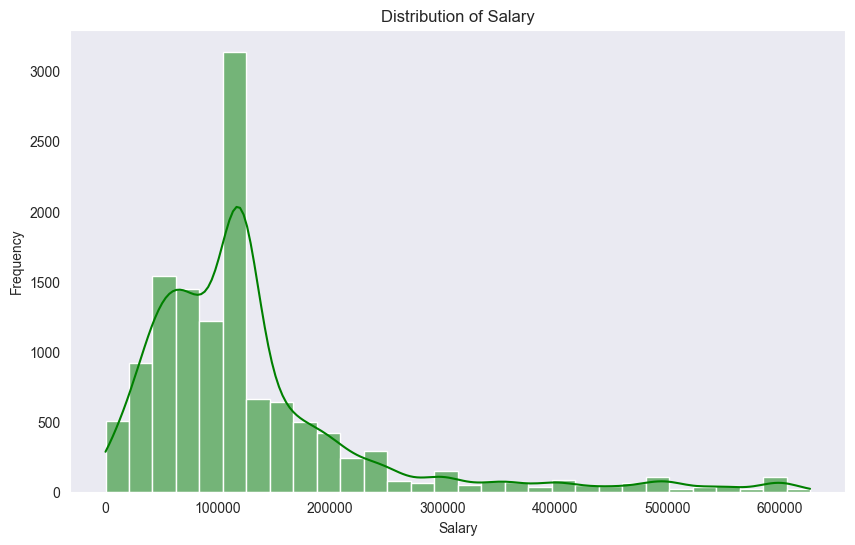

In [36]:
# Target variable
# Histogram of Salary distribution
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['CompTotal'], kde=True, color='green', bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

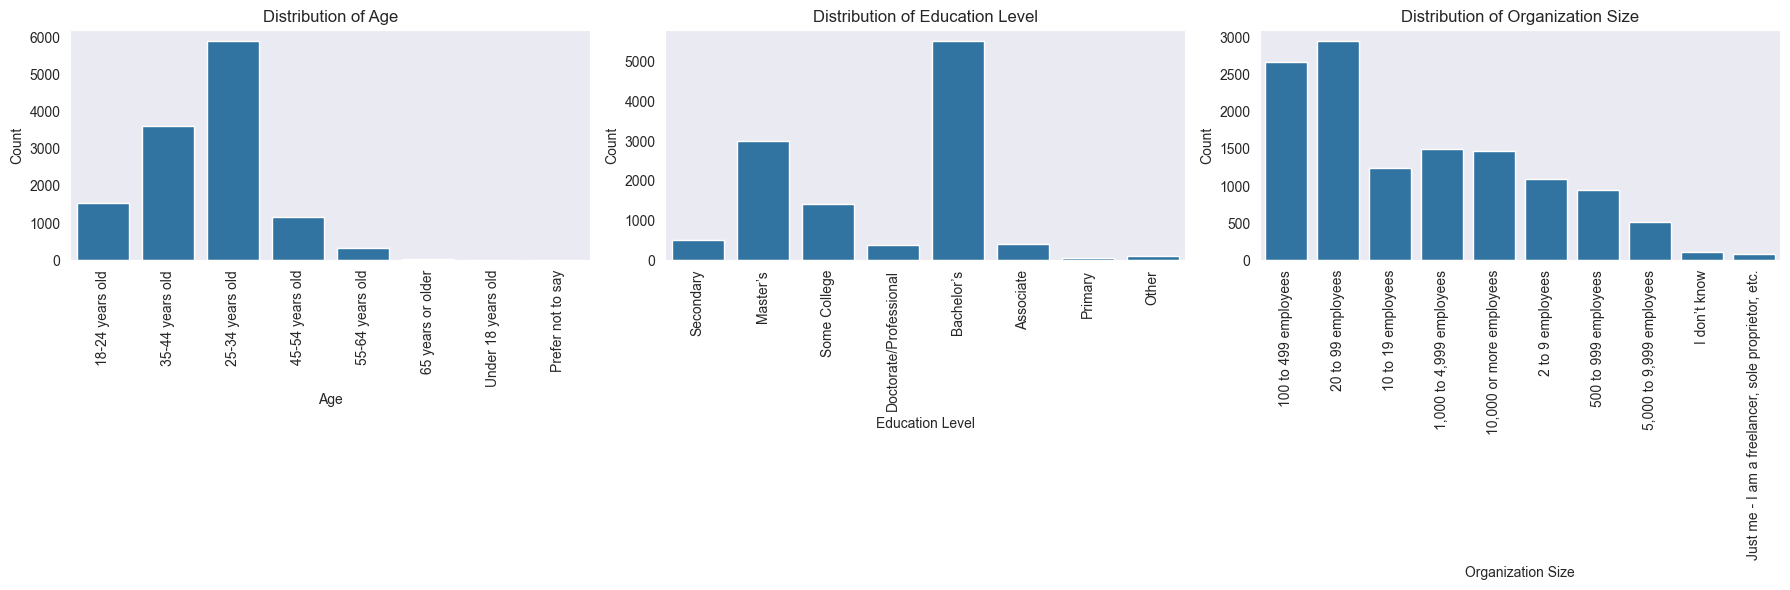

In [37]:
# Age, Education Level and Organization Size
# Create a figure with subplots to display all 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age'
sns.countplot(x='Age', data=df_cleaned, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'Edlevel'
sns.countplot(x='Edlevel_Simplified', data=df_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot for 'OrgSize'
sns.countplot(x='OrgSize', data=df_cleaned, ax=axes[2])
axes[2].set_title('Distribution of Organization Size')
axes[2].set_xlabel('Organization Size')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
# Replace special values with numeric equivalents for YearsCode and YearsCodePro
df_cleaned[['YearsCode', 'YearsCodePro']] = df_cleaned[['YearsCode', 'YearsCodePro']].replace({
    'More than 50 years': 51,
    'Less than 1 year': 0
})

In [39]:
# Convert both columns to integers
df_cleaned[['YearsCode', 'YearsCodePro']] = df_cleaned[['YearsCode', 'YearsCodePro']].apply(pd.to_numeric, errors='coerce', downcast='integer')


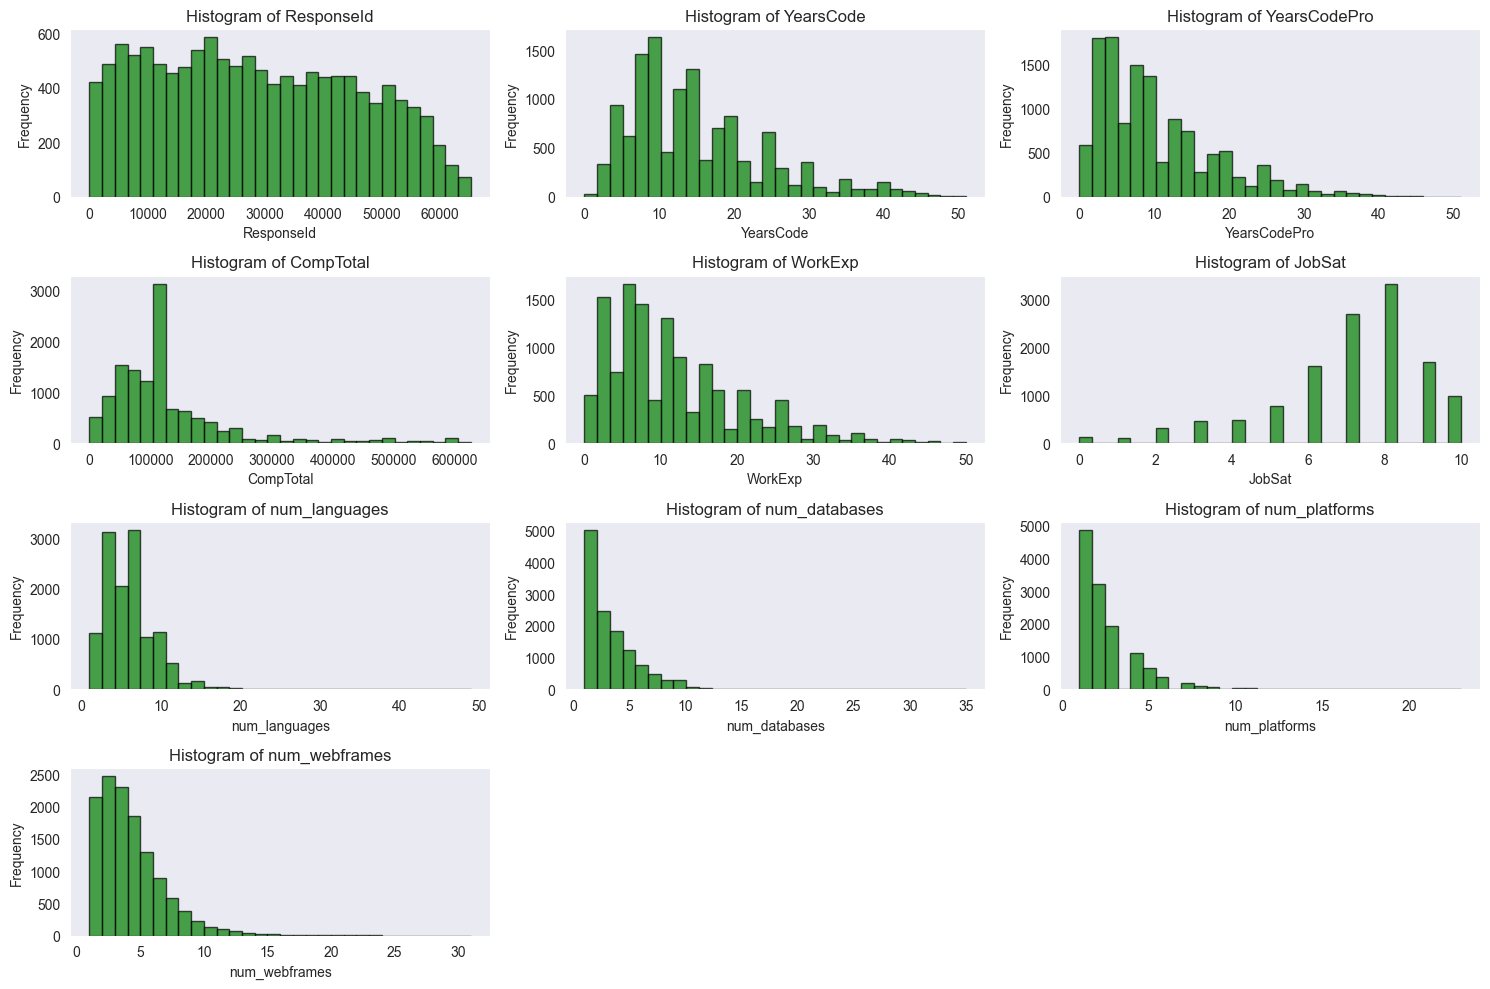

In [41]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust for layout
    plt.hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

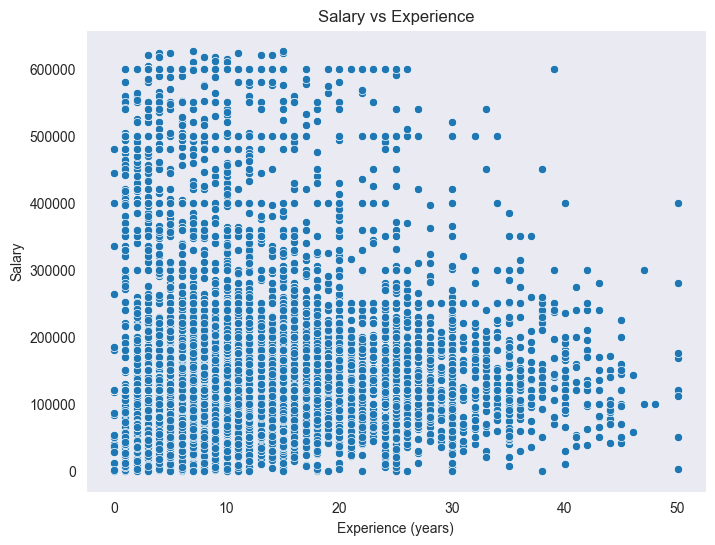

In [43]:
# Scatter plot of Salary vs Experience (assuming 'Experience' is a variable)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cleaned['WorkExp'], y=df_cleaned['CompTotal'])
plt.title('Salary vs Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

### 6. Feature Engineering 

### 7. Splitting Data into Training & Testing Sets

### 8. Model Training

### 9. Model Performance Metrics

### 10. Conclusion & Future Work